# The Numpy Random Package. Sam Tracey

[Official Numpy Documentation](https://numpy.org/doc/stable/reference/random/index.html)

***

In [1]:
# Efficient numerical arrays
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

In [2]:
# Change default style sheet [3]
plt.style.use('seaborn')
# change the default figure size [2]
plt.rcParams['figure.figsize'] = [10, 5]
 

<br>

## numpy.random.normal

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

***

In [3]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [4]:
# Examining first ten items in array s
s[:10]

array([-0.04579776,  0.09264871, -0.04960495,  0.29202872, -0.08631572,
       -0.10681393, -0.03405404, -0.05708306, -0.0437551 ,  0.02260506])

In [5]:
abs(mu - np.mean(s))

0.0033845565239213633

In [6]:
abs(sigma - np.std(s, ddof=1))

0.0026163747141535604

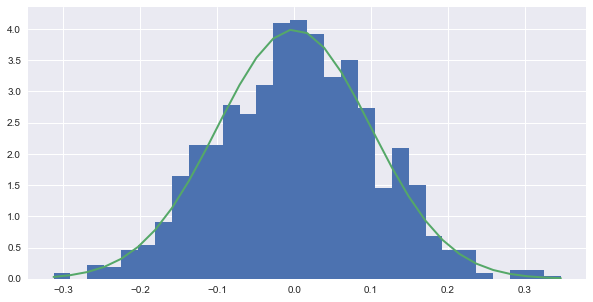

In [7]:
count, bins, ignored = plt.hist(s, 30, density=True)
f = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2/(2 * sigma **2))
plt.plot(bins, f, linewidth=2)
plt.show()

## References

[1] https://realpython.com/python-random/ <br>
[2] https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger <br>
[3] https://matplotlib.org/stable/tutorials/introductory/customizing.html

***

## End